# 1. Plotting for Exploratory data analysis  (EDA)



# 1.1 Huberman Survival Dataset

In [9]:
# importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [10]:
#read csv
data = pd.read_csv("haberman_data.csv")

In [11]:
data.shape

(306, 4)

In [12]:
data.columns


Index(['AGE', 'YEAR', 'NODES', 'SURVIVAL'], dtype='object')

In [13]:
data["SURVIVAL"].value_counts()

1    225
2     81
Name: SURVIVAL, dtype: int64

In [35]:
data['SURVIVAL'].unique()

array([1, 2], dtype=int64)

In [36]:
data['SURVIVAL'] = data['SURVIVAL'].map({1:"yes", 2:"no"})
data['SURVIVAL'] = data['SURVIVAL'].astype('category')
print(data.head())

   AGE  YEAR  NODES SURVIVAL
0   30    64      1      yes
1   30    62      3      yes
2   30    65      0      yes
3   31    59      2      yes
4   31    65      4      yes


In [48]:
#No missing values found in the dataset
data.isnull().values.any()

False

In [45]:
data.describe()

,AGE,YEAR,NODES
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


## Observations
AGE : The Age attribute vary from 30 to 83 with median of 52 with std of 10
YEAR : The year attribute vary from 58 to 69 with median of 63
NODES : The nodes attribute vary from 0 to 52 and it has 0 values for 25 percent of the data set and the values are less than 4 for 75 percent of the dataset.


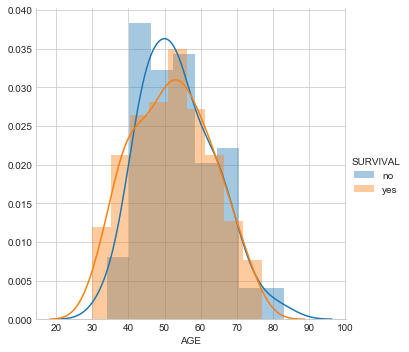

In [53]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue='SURVIVAL' , size = 5)\
.map(sns.distplot , "AGE")\
.add_legend();

plt.show()


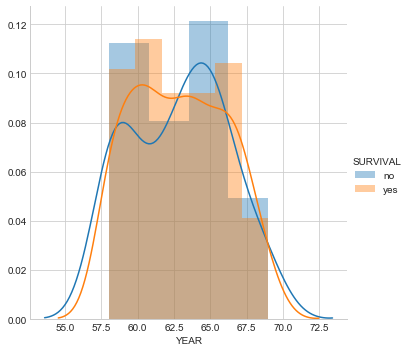

In [54]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue='SURVIVAL' , size = 5)\
.map(sns.distplot , "YEAR")\
.add_legend();

plt.show()


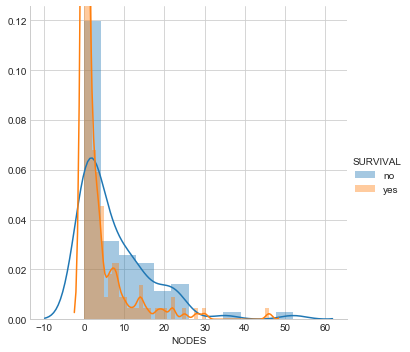

In [55]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue='SURVIVAL' , size = 5)\
.map(sns.distplot , "NODES")\
.add_legend();

plt.show()


## Observations
From the above histogram and the output of describe function we can make sense of it
Nodes attribute is the key attribute for classifying the target variable
More number of people who surived has 0 (or) less than 5 axilary nodes

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
AGE         306 non-null int64
YEAR        306 non-null int64
NODES       306 non-null int64
SURVIVAL    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


In [37]:
index = np.arange(len(data["SURVIVAL"].value_counts()))
index

array([0, 1])

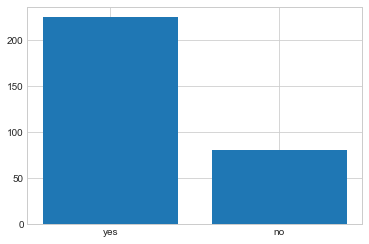

In [38]:
plt.bar(index , data['SURVIVAL'].value_counts())
plt.xticks(index ,data['SURVIVAL'].unique())
plt.show()

### Observations

1.There is class imbalance in the target variable.
2.SMOTING might help for better classification in the model building else classification might be more biased to 1

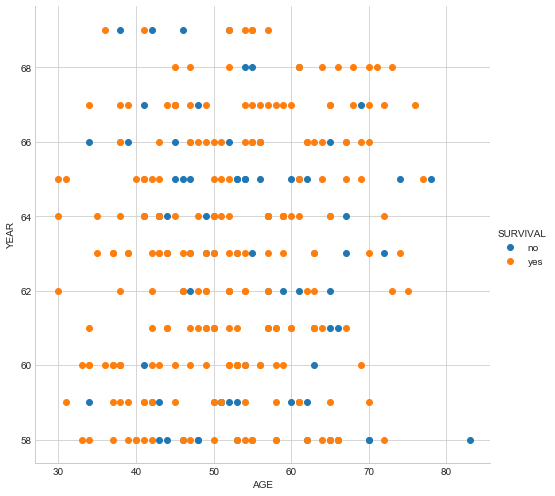

In [43]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue="SURVIVAL" , size = 7)\
.map(plt.scatter , "AGE" , "YEAR")\
.add_legend();

plt.show()

# Observations
1.Every Year
2.By looking above plot , we are not able to get much insights from the above AGE with YEAR attributes.


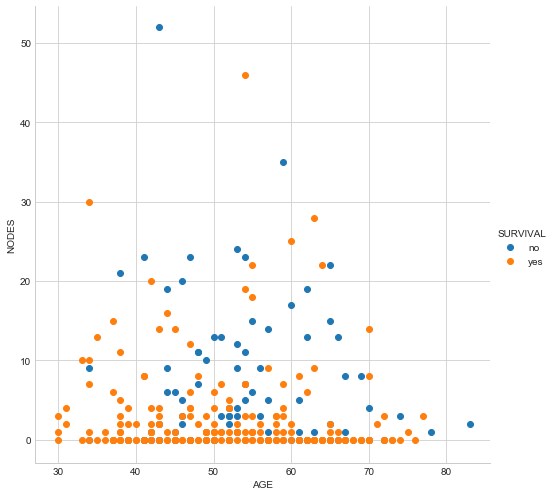

In [40]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue="SURVIVAL" , size = 7)\
.map(plt.scatter , "AGE" , "NODES")\
.add_legend();

plt.show()

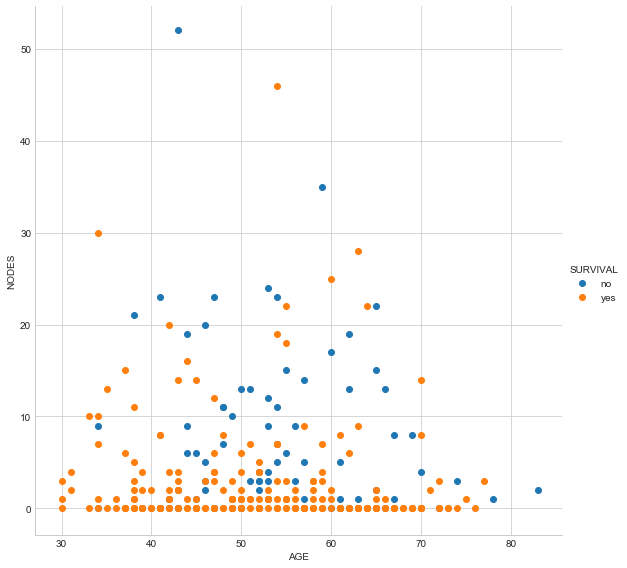

In [42]:
sns.set_style("whitegrid")
sns.FacetGrid(data , hue='SURVIVAL' , size =8)\
  .map(plt.scatter , 'AGE' , 'NODES') \
   .add_legend();
plt.show();

### Observations
1.From the above plot and using legend , we are able to analyze data and mostly we can see the data is overlap.
2.Now we need to use the other features and try to make anlysis easier by using pair plot.


# 1.3 Pair Plot


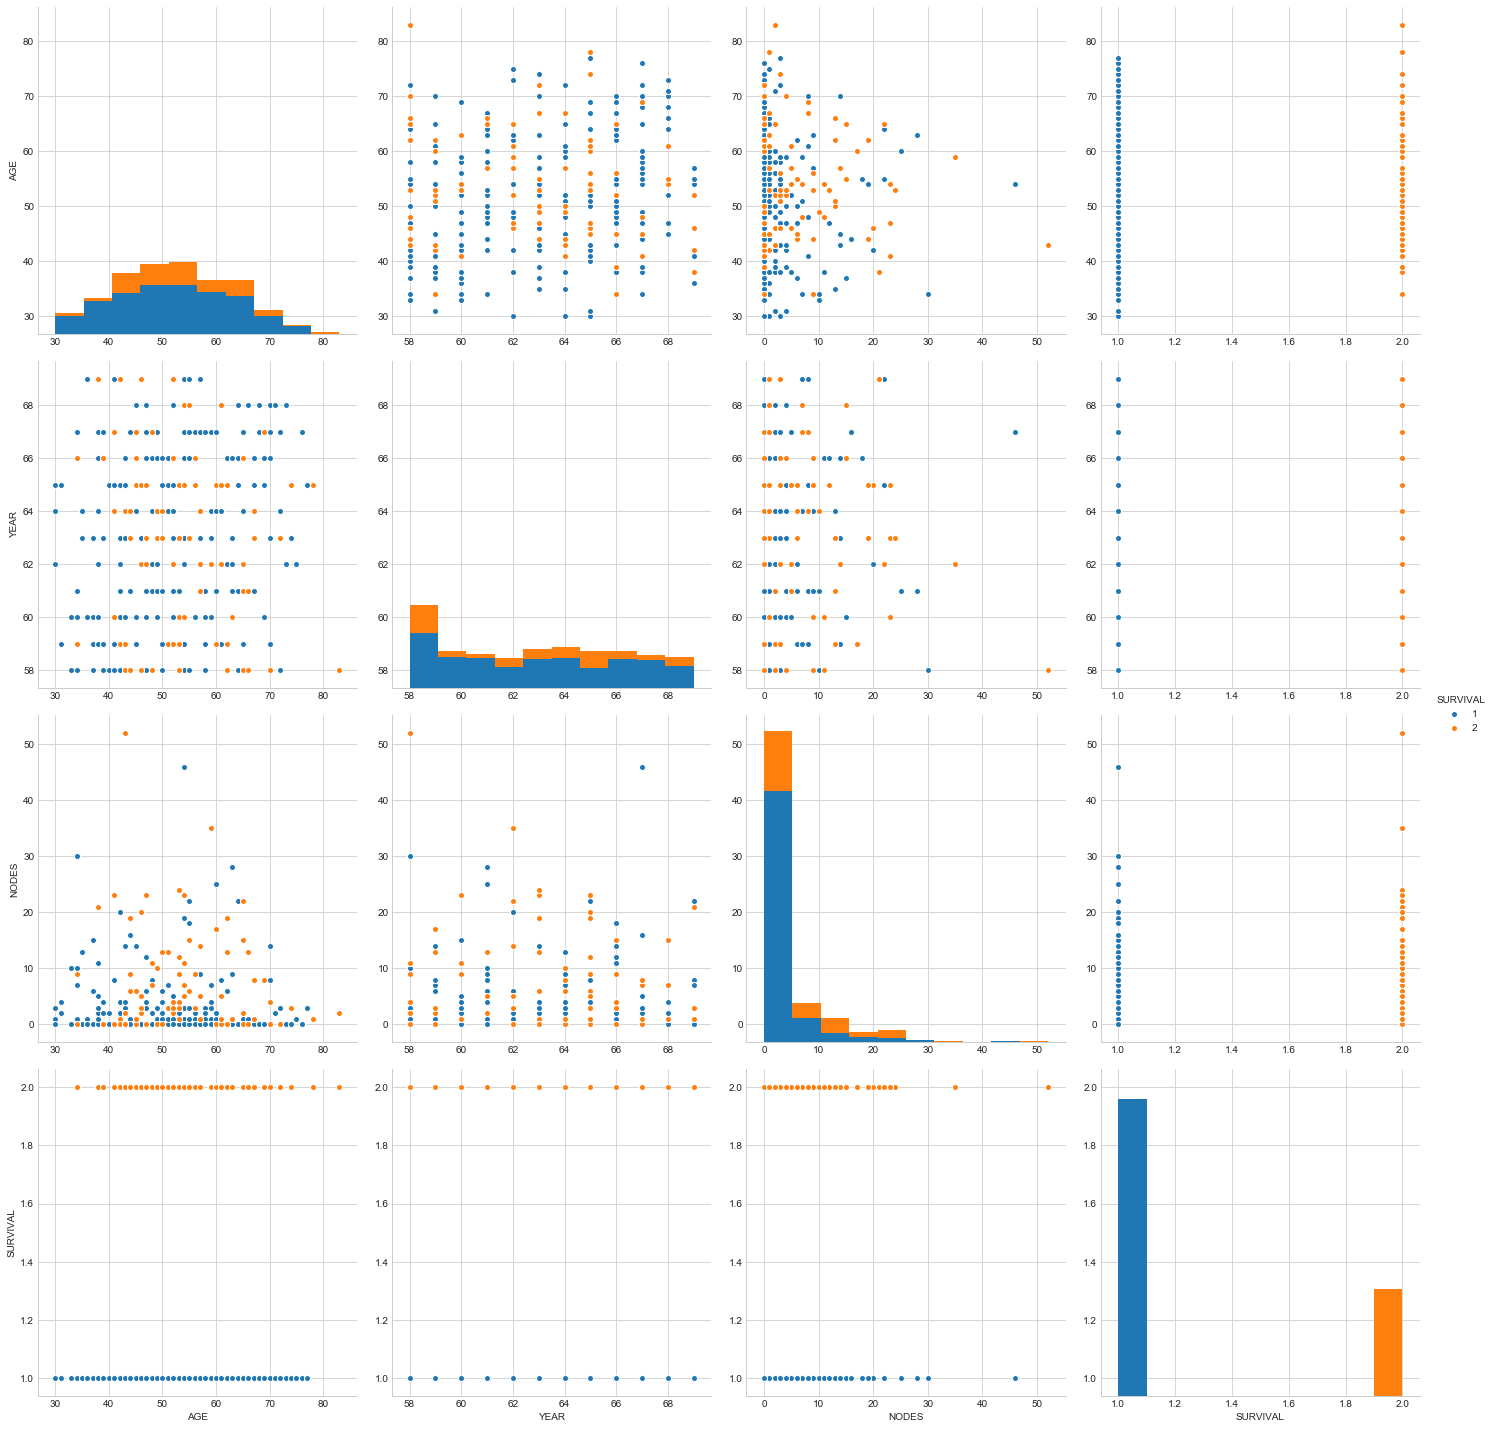

In [20]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="SURVIVAL" ,size = 5);
plt.show()


# Observations

As we are not able to get more insights from the other plots. From the above pair plot, we can conclude that AGE and NODES features are the key attributes for the target variable.


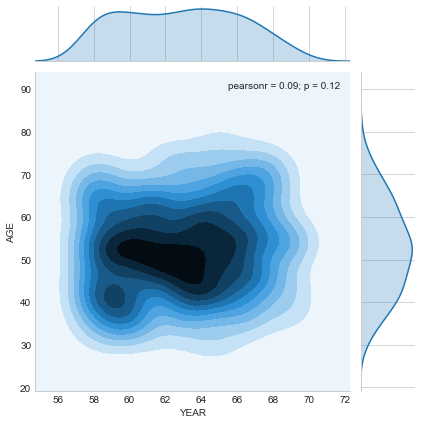

In [64]:
sns.jointplot(x= 'YEAR',kind = 'kde', y='AGE', data = data )
plt.show()

In the year between 1959 - 1964 , people containing age between 40 - 60 undergone the operation.